In [1]:
!pip install --user nolearn

    100% |████████████████████████████████| 327kB 1.1MB/s eta 0:00:01
    100% |████████████████████████████████| 184kB 4.7MB/s eta 0:00:01
  Running setup.py bdist_wheel for nolearn ... done
  Stored in directory: /gpfs/fs01/user/s7ed-a18f3badb92bc2-a9f6794a31ec/.cache/pip/wheels/9c/b3/e8/a863ca29687669deabe68012f333d5c5bd6c9b5a3bea4f2538
  Running setup.py bdist_wheel for gdbn ... done
  Stored in directory: /gpfs/fs01/user/s7ed-a18f3badb92bc2-a9f6794a31ec/.cache/pip/wheels/f1/aa/d7/7968a6696737f947ab854dc3394186a8fcfbd8aedcc8c66d07
  Running setup.py bdist_wheel for gnumpy ... done
  Stored in directory: /gpfs/fs01/user/s7ed-a18f3badb92bc2-a9f6794a31ec/.cache/pip/wheels/61/c5/d7/74a2e7afea611ed0469c95bfb9d21f89dd73f1f4f9ecd7a784
Successfully built nolearn gdbn gnumpy


In [2]:
import warnings
warnings.filterwarnings("ignore") #suppress warnings
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report
from sklearn import datasets
from nolearn.dbn import DBN
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

/gpfs/fs01/user/s7ed-a18f3badb92bc2-a9f6794a31ec/.local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


gnumpy: failed to import cudamat. Using npmat instead. No GPU will be used.


In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/")

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
mnist_images = mnist.train.images
mnist_labels = mnist.train.labels

In [5]:
trX, teX, trY, teY = train_test_split(mnist_images, mnist_labels.astype("int0"), test_size = 0.33)
print "Number of images for training:", trX.shape[0]
print "Number of images used for testing:", trY.shape[0]
pix = int(np.sqrt(teX.shape[1]))
print "Each image is:", pix, "by", pix, "pixels"

Number of images for training: 36850
Number of images used for testing: 36850
Each image is: 28 by 28 pixels


In [6]:
dbn = DBN(
    [trX.shape[1], 300, 10], 
    learn_rates = 0.3,
    learn_rate_decays = 0.9,
    epochs = 10, 
    verbose = 1) # set verbose to 0 for not printing output
dbn.fit(trX, trY)

[DBN] fitting X.shape=(36850, 784)
[DBN] layers [784, 300, 10]
[DBN] Fine-tune...


100%


Epoch 1:
  loss 2.31201524983
  err  0.896902173913
  (0:01:01)


100%


Epoch 2:
  loss 2.3031093415
  err  0.898152173913
  (0:00:56)


100%


Epoch 3:
  loss 2.3030200979
  err  0.899918478261
  (0:01:01)


100%


Epoch 4:
  loss 2.30309300837
  err  0.901902173913
  (0:01:00)


100%


Epoch 5:
  loss 2.3029172491
  err  0.897635869565
  (0:01:00)


100%


Epoch 6:
  loss 2.30296370216
  err  0.900163043478
  (0:00:59)


100%


Epoch 9:
  loss 2.30281360709
  err  0.899048913043
  (0:00:53)


100%


Epoch 10:
  loss 2.30280989274
  err  0.902092391304
  (0:00:52)


In [7]:
preds = dbn.predict(teX)
print classification_report(teY, preds)

             precision    recall  f1-score   support

          0       0.00      0.00      0.00      1793
          1       0.10      0.88      0.18      2027
          2       0.00      0.00      0.00      1900
          3       0.00      0.00      0.00      1835
          4       0.00      0.00      0.00      1775
          5       0.00      0.00      0.00      1605
          6       0.00      0.00      0.00      1796
          7       0.21      0.08      0.11      1870
          8       0.00      0.00      0.00      1744
          9       0.00      0.00      0.00      1805

avg / total       0.03      0.11      0.03     18150



In [8]:
##function to return random image and predict its class

def randIm():
    i = np.random.choice(np.arange(0, len(teY)), size = (1,))
    pred = dbn.predict(np.atleast_2d(teX[i]))
    image = (teX[i] * 255).reshape((28, 28)).astype("uint8")
    # show the prediction
    print "Actual digit is", teY[i][0], "predicted", pred[0]
    imgplot = plt.imshow(image)
    imgplot.set_cmap('gray')   

Actual digit is 2 predicted 1


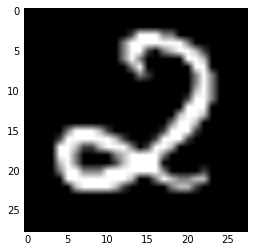

In [9]:
randIm() #run this cell multiple times to get random images and predicted outputs